<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from enm.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from enm.enm import Enm

In [2]:
%load_ext rpy2.ipython


In [5]:
import seaborn as sns

In [6]:
os.chdir('../')

In [6]:
data_path = 'data/interim/pcc_prs_0713/'
with open(f'data/interim/pcc_0601/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)



In [7]:
e_pcc.figure_path = 'reports/figures/0807_pres_figures/'

In [8]:
e_pcc.get_category("data/interim/strain_ids_with_experiment_count_all.csv")

In [9]:
df = e_pcc.df

R[write to console]: ── Attaching packages ────────────────────────────────── tidyverse 1.3.0.9000 ──

R[write to console]: ✔ ggplot2 3.3.2          ✔ purrr   0.3.4     
✔ tibble  3.0.2          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



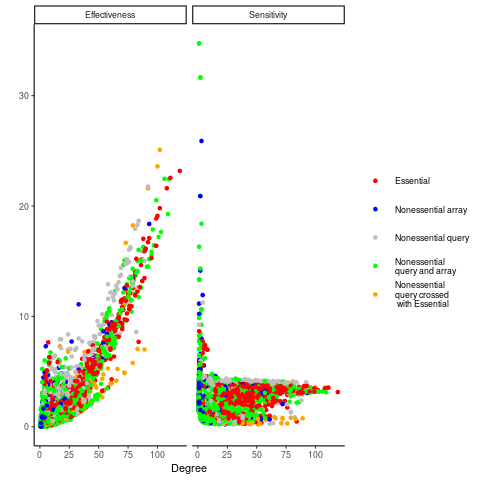

In [10]:
%%R -i df
library(tidyverse)
colnames(df)
df%>% 
    select(orf_name,cat_,eff,sens,deg)%>%
    pivot_longer(cols = eff:sens)%>%
    mutate(name = ifelse(name=='eff','Effectiveness','Sensitivity'))%>%
    ggplot(aes(x=deg,y=value,color=cat_))+geom_point()+facet_wrap(~name)+theme_classic()+
    scale_colour_manual(values=c("red",'blue',"grey",'green','orange'))+ylab("")+xlab("Degree")+theme(legend.title=element_blank(),
    legend.key.height = unit(1, "cm"),
        legend.key.width = unit(1, "cm"))
    #ggsave('reports/figures/0807_pres_figures/eff_sens_colored.png',width=9,height=5)

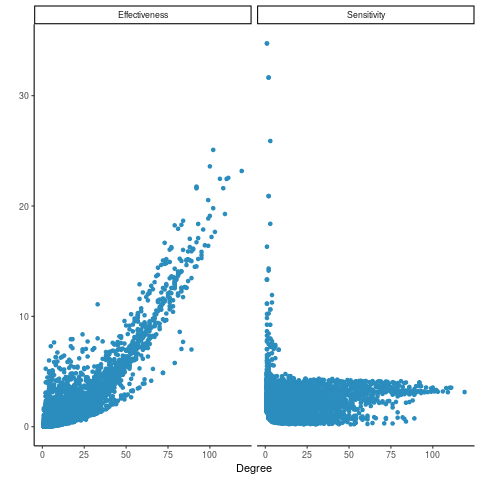

In [11]:
%%R -i df
library(tidyverse)
colnames(df)
df%>% 
    select(orf_name,cat_,eff,sens,deg)%>%
    pivot_longer(cols = eff:sens)%>%
    mutate(name = ifelse(name=='eff','Effectiveness','Sensitivity'))%>%
    ggplot(aes(x=deg,y=value))+geom_point(color='#2b8cbe')+facet_wrap(~name)+theme_classic()+
    scale_colour_manual(values=c("red",'blue',"grey",'green','orange'))+ylab("")+xlab("Degree")+theme(legend.title=element_blank(),
    legend.key.height = unit(1, "cm"),
        legend.key.width = unit(1, "cm"))
    #ggsave('reports/figures/0807_pres_figures/eff_sens_noncolored.png',width=7,height=5)

In [175]:
rewire_df = e_pcc.rewire_df

In [176]:
%%R -i df -i rewire_df
cols <- c("LINE1"="#f04546","LINE2"="#3591d1","BAR"="#62c76b")

ggplot(rewire_df,aes(x=eff_deg_pearson))+
stat_density(aes(linetype="Simulations"),geom = "line", position = "identity",trim=TRUE)+
geom_vline(aes(xintercept=cor(df$deg,df$eff),linetype='Real correlation'),color='red',size=2)+
theme_bw()+xlab('Effectiveness - degree correlation')+
scale_linetype_manual(name = "", values = c(1, 1), 
                      guide = guide_legend(override.aes = list(color = c("Red", "Black"))))
#scale_colour_manual(name="Error Bars",values=cols,guide='legend') #+ scale_fill_manual(name="Bar",values=[1,2]) +
ggsave('reports/figures/0807_pres_figures/eff_corr.png',width=6,height=5)
ggplot(rewire_df,aes(x=sens_deg_spearman))+
stat_density(aes(linetype="Simulations"),geom = "line", position = "identity",trim=TRUE)+
geom_vline(aes(xintercept=cor(df$deg,df$sens),linetype='Real correlation'),color='red',size=2)+
theme_bw()+xlab('Sensitivity - degree correlation')+
scale_linetype_manual(name = "", values = c(1, 1), 
                      guide = guide_legend(override.aes = list(color = c("Red", "Black"))))
#scale_colour_manual(name="Error Bars",values=cols,guide='legend') #+ scale_fill_manual(name="Bar",values=[1,2]) +

ggsave('reports/figures/0807_pres_figures/sens_corr.png',width=6,height=5)

In [191]:
e_pcc.spring_pos()

In [192]:
pos = e_pcc.graph_gc.nodes('pos')

In [195]:
adj = nx.adjacency_matrix(e_pcc.graph_gc)

In [198]:
dist_mat = np.zeros(adj.shape)

In [207]:
for i,val_i in enumerate(e_pcc.nodes):
    for j, val_j in enumerate(e_pcc.nodes):
        dist_mat[i,j]=np.linalg.norm(pos[val_i]-pos[val_j])

In [238]:
import copy
dist_mat_connected = copy.deepcopy(dist_mat)
dist_mat_pairwise= copy.deepcopy(dist_mat)

In [239]:
x, y = np.where(np.array(adj.todense())==0)
dist_mat_copy[x, y] = np.inf

In [243]:
e_pcc.get_node_distances()
dist_to_center = e_pcc.dist_to_center

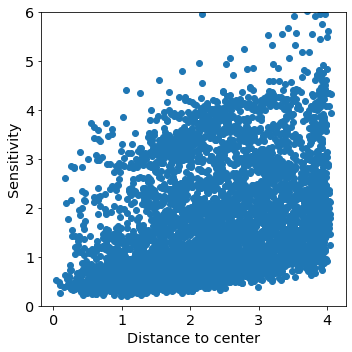

In [269]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter([j for i , j in dist_to_center.items()],(df.sens))
ax.set_xlabel('Distance to center')
ax.set_ylabel('Sensitivity')
ax.set_ylim(0,6)
plt.tight_layout()

In [264]:
from scipy.stats import pearsonr, spearmanr

pearsonr([j for i , j in dist_to_center.items()],(df.sens))

(0.28637682583345686, 2.0724546947497838e-98)

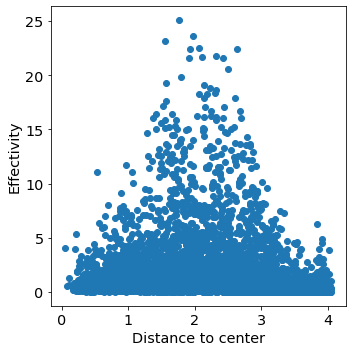

In [288]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter([j for i , j in dist_to_center.items()],(df.eff))
ax.set_xlabel('Distance to center')
ax.set_ylabel('Effectivity')
#ax.set_ylim(0,6)
plt.tight_layout()

In [257]:
e_pcc.plot_network_spring(plot_legend=False)

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(array([3210.,  936.,  429.,  246.,  141.,   93.,   77.,   34.,   12.,
           5.]),
 array([  1. ,  12.8,  24.6,  36.4,  48.2,  60. ,  71.8,  83.6,  95.4,
        107.2, 119. ]),
 <a list of 10 Patch objects>)

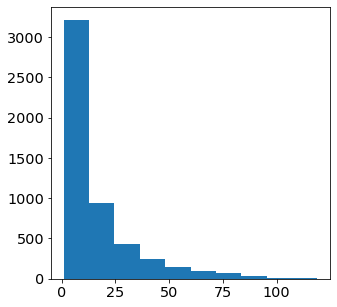

In [34]:
plt.hist(df.deg)

In [42]:
df.loc[df.sens>7,["Systematic gene name"]].iloc[:,0].unique()

array(['YMR058W', 'YGL071W', 'YIR023W', 'YCL025C', 'YOR034C', 'YHR046C',
       'YDR441C', 'YPL109C', 'YDR463W', 'YBR068C', 'YOR273C', 'YIL132C',
       'YAL042W', 'YLR377C', 'YOL071W', 'YMR057C', 'YPL262W', 'YCR062W',
       'YBR018C', 'YMR186W', 'YDL090C', 'YOR027W', 'YOR136W', 'YNL037C',
       'YOR135C', 'YNL076W', 'YGL036W', 'YKL085W', 'YOL067C', 'YGL252C',
       'YBL103C', 'YFL034C-B', 'YNL204C', 'YBR186W', 'YHR006W', 'YKL132C',
       'YOR124C', 'YJL089W', 'YGL232W', 'YNL046W'], dtype=object)